<h1>Проект 5.10.2.

<h1>Кейс №2 - Приложение доставки</h1>

Вы работаете аналитиком в приложении по доставке продуктов.<br>
Команда внедрила в приложение умную систему рекомендации товаров – <br>
предполагается, что такая система поможет пользователям эффективнее работать <br>
с приложением и лучше находить необходимые товары.

Чтобы проверить эффективность системы рекомендаций, был проведен АБ-тест. <br>
<b><i>В группе 1 оказались пользователи с новой системой рекомендаций, <br>
в группе 0 пользователи со старой версией приложения, где нет рекомендации товаров.</b></i>

<b>Ваша задача – оценить, смогла ли новая система рекомендаций принести пользу бизнесу <br>
и пользователям приложения.</b> Для этого нужно выбрать метрики, которые отвечают за качество сервиса, <br>
и статистически сравнить эти метрики в двух группах.

Результат вашей работы – аналитическое заключение с ответом на вопрос, <br>
стоит ли включать новую систему рекомендаций на всех пользователей.

В данных вы найдете логи заказов пользователей:
<ol>
<li>ab_users_data – история заказов пользователей, <br>в этой таблице есть информация о том, какие заказы создавали и отменяли пользователи</li>
<li>ab_orders – подробная информация о составе заказа,  <br>тут для каждого заказа есть список id тех продуктов, которые были включены в заказ</li>
<li>ab_products – подробная информация о продуктах, их название и стоимость</li>
</ol>
<br><b>NB! Не стоит использовать интерактивные графики в итоговом файле – они имеют смысл только в динамических отчётах вроде веб-страницы.</b>

В поле ответа прикрепите файл формата .ipynb — то есть обычный Jupyter Notebook со всеми вашими действиями, результатами, графиками и выводами.

#### БИБЛИОТЕКИ

In [1]:
# Подключим библиотеку pandas и назовем её pd
import pandas as pd
# Подключим библиотеку numpy и назовем её np
import numpy as np
# Подключим библиотеку scipy, и возьмем оттуда модуль со stats (статистические распределения и функции)
from scipy import stats as ss
import pingouin as pg
from scipy.stats import bootstrap as bs

# Импорт библиотек проводника
import os
# Импорт библиотек даты-времени
import datetime


# Подключим библиотеку seaborn и назовем её sns
import seaborn as sns
# Подключим библиотеку matplotlib и назовем её plt
import matplotlib.pyplot as plt
# Разрешим строить графики в интерактивном режиме
%matplotlib inline
# Подключим библиотеку plotly и назовем её px
import plotly.express as px

#### ЗАГРУЗКА ДАННЫХ

In [2]:
# Чтобы узнать текущую дирректорию
os.getcwd()
# Чтобы узнать что лежит в текущей дирректории
os.listdir()
# - ~/ - относительный путь
# - ../ - путь с поднятием вверх из другой папки до корневой
# (подъём на уровень выше - домашняя директория ~)

# Запишем путь файла в переменную
path_df_users_data = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-mihalev/Statistic-Python_Lessions/Lecture_10/ab_users_data.csv"
path_df_orders = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-mihalev/Statistic-Python_Lessions/Lecture_10/ab_orders.csv"
path_df_products = "/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-mihalev/Statistic-Python_Lessions/Lecture_10/ab_products.csv"
# Cчитаем DF c помощью лямбда-функции
download_df = lambda x:  pd.read_csv(x, sep=',') # , dtype={'Year': 'int'}
# Присвоим переменную датафрейму
ab_users_data = download_df(path_df_users_data)
ab_orders = download_df(path_df_orders)
ab_products = download_df(path_df_products)

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


#### ПРОВЕРКА ДАННЫХ

In [3]:
# Проверим размер DF
print("Размер таблицы истории заказов пользователей:\n{}".format(ab_users_data.shape), "\n")
print("Размер таблицы состава заказов пользователей:\n{}".format(ab_orders.shape), "\n")
print("Размер таблицы информации о продуктах:\n{}".format(ab_products.shape), "\n")

# Преобразуем колонки object в datetime
ab_users_data.time = pd.to_datetime(ab_users_data.time)
ab_users_data.date = pd.to_datetime(ab_users_data.date)
ab_orders.creation_time = pd.to_datetime(ab_orders.creation_time)

# Проверим типы данных столбцов DF
print("Форматы колонок таблицы истории заказов пользователей:\n{}".format(ab_users_data.dtypes), '\n')
print("Форматы колонок таблицы состава заказов пользователей:\n{}".format(ab_orders.dtypes), '\n')
print("Форматы колонок таблицы информации о продуктах:\n{}".format(ab_products.dtypes), '\n')

# Проверим DF на пропуски
print("Число пропусков в колонках таблицы истории заказов пользователей:\n{}".format(ab_users_data.isna().sum()), '\n')
print("Число пропусков в колонках таблицы состава заказов пользователей:\n{}".format(ab_orders.isna().sum()), '\n')
print("Число пропусков в колонках таблицы информации о продуктах:\n{}".format(ab_products.isna().sum()), '\n')



Размер таблицы истории заказов пользователей:
(4337, 6) 

Размер таблицы состава заказов пользователей:
(4123, 3) 

Размер таблицы информации о продуктах:
(87, 3) 

Форматы колонок таблицы истории заказов пользователей:
user_id              int64
order_id             int64
action              object
time        datetime64[ns]
date        datetime64[ns]
group                int64
dtype: object 

Форматы колонок таблицы состава заказов пользователей:
order_id                  int64
creation_time    datetime64[ns]
product_ids              object
dtype: object 

Форматы колонок таблицы информации о продуктах:
product_id      int64
name           object
price         float64
dtype: object 

Число пропусков в колонках таблицы истории заказов пользователей:
user_id     0
order_id    0
action      0
time        0
date        0
group       0
dtype: int64 

Число пропусков в колонках таблицы состава заказов пользователей:
order_id         0
creation_time    0
product_ids      0
dtype: int64 

Чи

<h4>ИCCЛЕДУЕМ ДАННЫЕ</h4>
<ul>
<li>Заказ - любой созданный заказ (может быть отмененным, а может быть покупкой)</li>
<li>Покупка - созданный и не отменённый заказ</li>

In [4]:
# Найдем дубликаты в DF, чтобы определить отменённые заказы
df_order_id_cancelled = ab_users_data.order_id.loc[ab_users_data.order_id.duplicated()]
df_order_id_cancelled

8        1258
39       1296
47       1298
54       1308
60       1315
        ...  
4221    54938
4255    56612
4259    56772
4307    58492
4321    59055
Name: order_id, Length: 214, dtype: int64

In [5]:
cancelled_orders = ab_users_data.query("action == 'cancel_order'").sort_values('order_id')
cancelled_orders

,user_id,order_id,action,time,date,group
8,966,1258,cancel_order,2022-08-26 00:08:25.486419,2022-08-26,0
39,993,1296,cancel_order,2022-08-26 00:44:18.150475,2022-08-26,0
47,995,1298,cancel_order,2022-08-26 00:49:51.514240,2022-08-26,0
54,1002,1308,cancel_order,2022-08-26 00:58:01.924112,2022-08-26,1
60,1008,1315,cancel_order,2022-08-26 01:06:11.292953,2022-08-26,0
...,...,...,...,...,...,...
4221,1498,54938,cancel_order,2022-09-08 06:46:29.885081,2022-09-08,0
4255,1658,56612,cancel_order,2022-09-08 13:31:37.085777,2022-09-08,0
4259,1314,56772,cancel_order,2022-09-08 14:09:53.652063,2022-09-08,1
4307,988,58492,cancel_order,2022-09-08 20:07:22.918779,2022-09-08,1


In [6]:
print(f"Отменённых заказов всего {cancelled_orders.shape[0]} штук")
print(f"Столько же ({cancelled_orders.shape[0]} штук) и созданных перед отменой")

Отменённых заказов всего 214 штук
Столько же (214 штук) и созданных перед отменой


In [7]:
# Выведем DF ЗАКАЗОВ
# Оставим и покупки и отмененные заказы - отавим все заказы
df_users_data_allorders = ab_users_data.query("action == 'create_order'").sort_values('order_id')
df_users_data_allorders

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27,2022-08-26,0
3,966,1258,create_order,2022-08-26 00:02:56,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37,2022-08-26,1
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0


In [8]:
print(f"Всего заказов всего {df_users_data_allorders.shape[0]} штук")

Всего заказов всего 4123 штук


In [9]:
# Выведем DF ПОКУПОК
# Удалим из общего DF все отмененные заказы и номера созданных заказов, которые совпадают с отмененными
df_users_data_purchases = ab_users_data.drop_duplicates(subset='order_id', keep=False)
df_users_data_purchases

,user_id,order_id,action,time,date,group
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1
2,964,1257,create_order,2022-08-26 00:02:27,2022-08-26,0
4,967,1259,create_order,2022-08-26 00:03:37,2022-08-26,1
5,968,1261,create_order,2022-08-26 00:05:35,2022-08-26,0
...,...,...,...,...,...,...
4332,990,59422,create_order,2022-09-08 23:13:03,2022-09-08,1
4333,1418,59439,create_order,2022-09-08 23:18:05,2022-09-08,1
4334,1605,59464,create_order,2022-09-08 23:22:27,2022-09-08,0
4335,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0


In [10]:
print(f"Всего покупок всего {df_users_data_purchases.shape[0]} штук")

Всего покупок всего 3909 штук


#### РАЗБИВКА DF НА 2 ГРУППЫ
<ol>
    <li>1 группа (контрольная) - старая версия, без рекомендаций товаров</li>
    <li>2 группа (тестовая) - новая версия, с рекомендацями товаров</li>
</ol>

In [13]:
# Cмерджим первые 2 таблицы
df_usersdata_and_orders = ab_users_data.merge(ab_orders, on='order_id', how="left")
df_usersdata_and_orders['count_product_ids'] =  df_usersdata_and_orders.product_ids.str.strip('{}').str.split(',').str.len()               

#  0 группа (контрольная)
df_usersdata_and_orders_control = df_usersdata_and_orders.query("group == 0")

#  1 группа (тестовая)
df_usersdata_and_orders_test = df_usersdata_and_orders.query("group == 1")

<h4>Какие метрики отвечают за качество сервиса?</h4><br>
<blockquote>AB-тест должен ответить на вопрос: 
    <blockquote><b>"Лучше ли работает внедрённая система рекомендаций товаров?"</b></blockquote>
<br>Метрики <i>улучшения качества сервиса:</i>
<ol> 
  <li>Количество заказов, совершённых уникальным пользователем</li>     
  <li>Количество покупок, совершённых уникальным пользователем</li>   
  <li>Количество продуктов в покупке</li>   
</ol>    
    </blockquote>

<H1>1 МЕТРИКА:<BR><BR>
   <I>КОЛИЧЕСТВО ЗАКАЗОВ, СОВЕРШЁННЫХ УНИКАЛЬНЫМ ПОЛЬЗОВАТЕЛЕМ</H1>

In [14]:
# Выделим распределения
df_orders = df_users_data_allorders.groupby(["user_id", "group" ], as_index=False)\
                                                    .agg({"order_id":"count"})\
                                                    .rename(columns={"order_id":"order_counts"})\
                                                    .sort_values(["user_id", "group"], ascending=True)
# Выделим группы
df_orders_test = df_orders[df_orders.group == 1]
df_orders_control = df_orders[df_orders.group == 0]

# Размер выборок
print(f'Размер тестовой группы: {df_orders_test.shape[0]}')
print(f'Размер контрольной группы: {df_orders_control.shape[0]}')

Размер тестовой группы: 502
Размер контрольной группы: 515


In [15]:
df_orders

,user_id,group,order_counts
0,964,0,2
1,965,1,9
2,966,0,1
3,967,1,5
4,968,0,3
...,...,...,...
1012,1976,1,5
1013,1977,1,4
1014,1978,1,7
1015,1979,1,6


<h2>Проверка распределений на НОРМАЛЬНОСТЬ</h2><br>
<b>Используем normaltest, тк размер выборок > 30</b>

In [16]:
pg.normality(data=df_orders, dv="order_counts", group='group', method='normaltest')

,W,pval,normal
0,168.681745,2.350847e-37,False
1,21.897130,1.758323e-05,False


Тест показал, что распределения ненормальны! Посмотрим на их визуальзацию.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

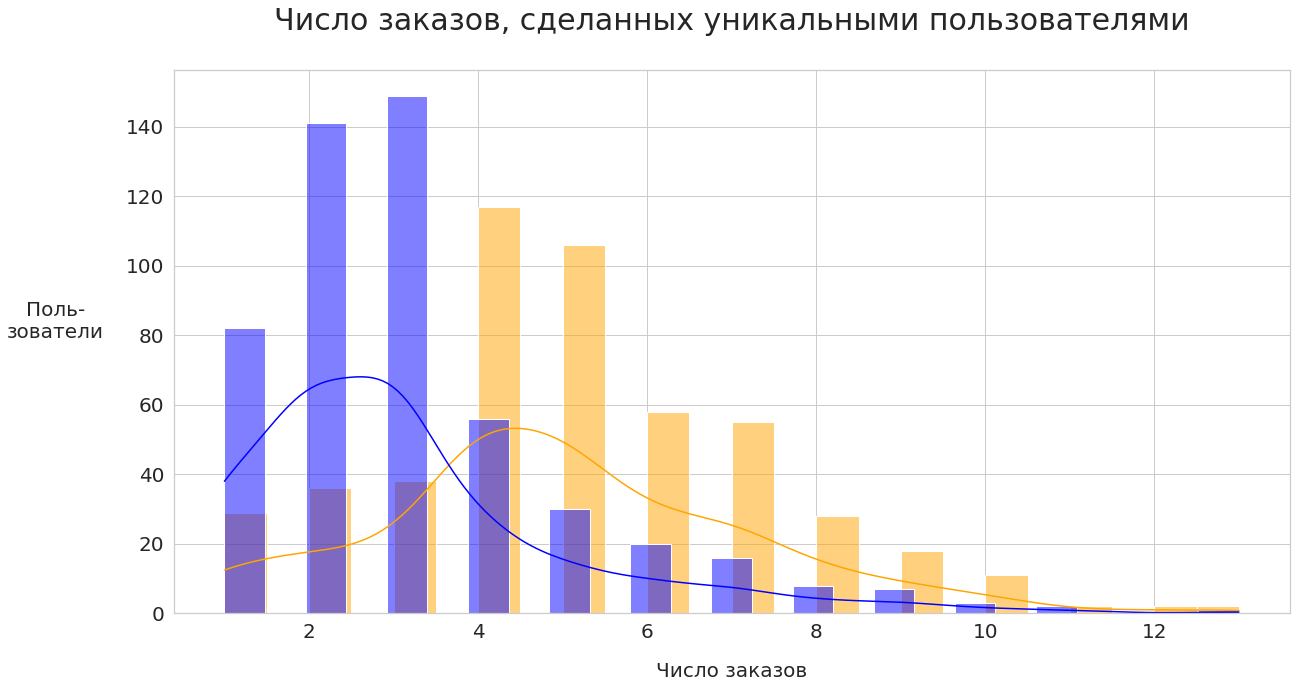

In [17]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.histplot(data=df_orders_test.order_counts, color='orange', kde=True)
sns.histplot(data=df_orders_control.order_counts, color='blue',  kde=True)

# Сделаем подписи к графику
plt.title('Число заказов, сделанных уникальными пользователями\n', fontsize=30)
plt.xlabel('Число заказов', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Поль-\nзователи', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

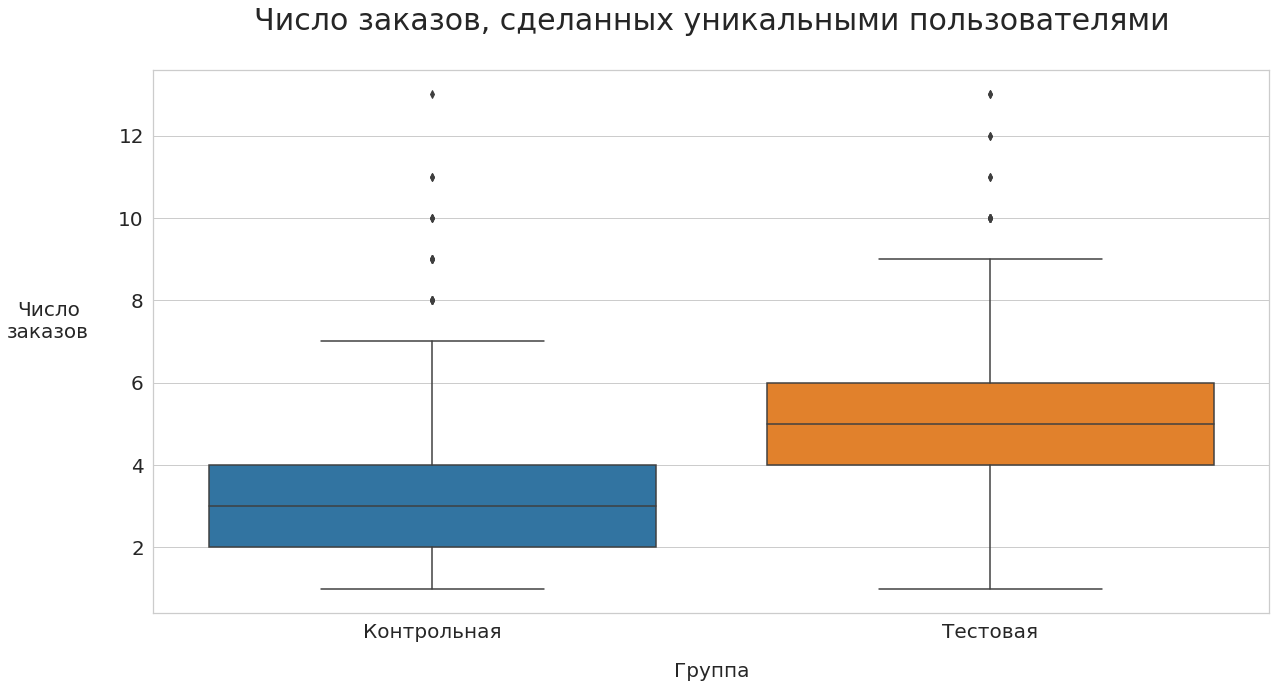

In [18]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.boxplot(data=df_orders,y='order_counts',x='group')

# Сделаем подписи к графику
plt.title('Число заказов, сделанных уникальными пользователями\n', fontsize=30)
plt.xlabel('Группа', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Число\nзаказов', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
groups = ["Контрольная","Тестовая"]
plt.xticks(range(2), groups, fontsize=20)
plt.yticks(fontsize=20)

<h2>Проверка распределений на ГОМОГЕННОСТЬ ДИСПЕРСИЙ</h2><br>
<b>
<ul>
<li>Нулевая гипотеза - дисперсии равны</li>
<li>Альтернативная гипотеза - дисперсии НЕ равны</li>


</b>

In [19]:
# Проверка через критерий Левена - pingouin
pg.homoscedasticity(data=df_orders, dv="order_counts", group='group')

,W,pval,equal_var
levene,16.16773,0.000062,False


Тест показал, что p-value < 0.05 - отклоняем нулевую гипотезу,<br>
Дисперсии распределений НЕ ГОМОГЕННЫ.

<h2>Используем метод BOOTSTRAP</h2><br>
Так как ни одно из условай для применения Т-теста не выполнено.<br>
<blockquote><ul> 
<li>H0 - cредние значения равны</li>
<li>H1 - cредние значения не равны</li>
</ul>  </blockquote>
<b>

In [20]:
print(f'Cреднее значение тестовой группы = {np.mean(df_orders_test.order_counts)}')
print(f'Cреднее значение контрольной группы = {np.mean(df_orders_control.order_counts)}')

Cреднее значение тестовой группы = 5.00796812749004
Cреднее значение контрольной группы = 3.124271844660194


In [21]:
# Cравним средние
bs_orders_test = bs((df_orders_test.order_counts, ), np.mean)
bs_orders_test

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.818725099601593, high=5.203187250996016), standard_error=0.0985956755661805)

In [22]:
bs_orders_control = bs((df_orders_control.order_counts, ), np.mean)
bs_orders_control

BootstrapResult(confidence_interval=ConfidenceInterval(low=2.962725892977501, high=3.297087378640777), standard_error=0.08470906645105646)


Исходя из наложения доверительных интервалов средних значений, видно что им явно далеко до пересечения,<br>
отклоняем нулевую гипотезу, а изменения признаём статзначимыми в положительную сторону.



<H1>2 МЕТРИКА:<BR><BR>
   <I>КОЛИЧЕСТВО ПОКУПОК, СОВЕРШЁННЫХ УНИКАЛЬНЫМ ПОЛЬЗОВАТЕЛЕМ</H1>

In [23]:
# Выделим распределения
df_purchases = df_users_data_purchases.groupby(["user_id", "group" ], as_index=False)\
                                                    .agg({"order_id":"count"})\
                                                    .rename(columns={"order_id":"purchase_counts"})\
                                                    .sort_values(["user_id", "group"], ascending=True)
# Выделим группы
df_purchases_test = df_purchases[df_purchases.group == 1]
df_purchases_control = df_purchases[df_purchases.group == 0]

# Размер выборок
print(f'Размер тестовой группы: {df_purchases_test.shape[0]}')
print(f'Размер контрольной группы: {df_purchases_control.shape[0]}')

Размер тестовой группы: 501
Размер контрольной группы: 512


<h2>Проверка распределений на НОРМАЛЬНОСТЬ</h2><br>
<b>Используем normaltest, тк размер выборок > 30</b>

In [24]:
pg.normality(data=df_purchases, dv="purchase_counts", group='group', method='normaltest')

,W,pval,normal
0,178.266627,1.949368e-39,False
1,17.210719,1.831217e-04,False


Тест показал, что распределения ненормальны! Посмотрим на их визуальзацию.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

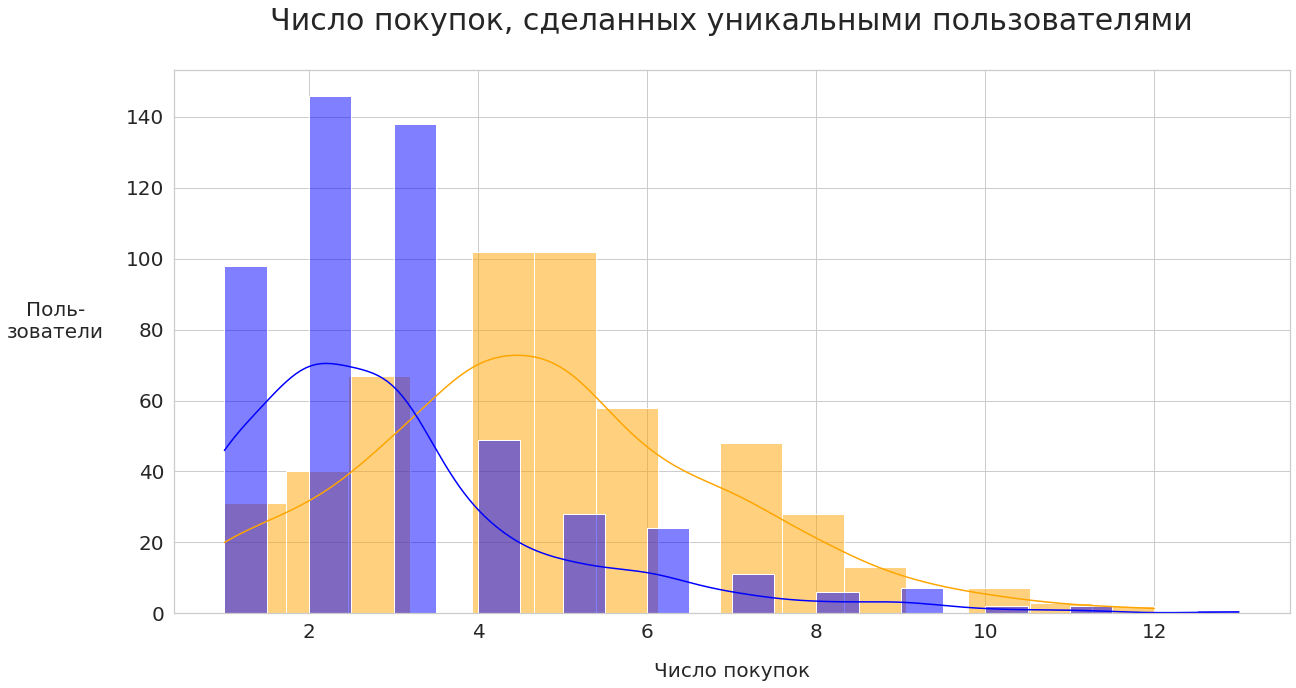

In [25]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.histplot(data=df_purchases_test.purchase_counts, color='orange', kde=True)
sns.histplot(data=df_purchases_control.purchase_counts, color='blue',  kde=True)

# Сделаем подписи к графику
plt.title('Число покупок, сделанных уникальными пользователями\n', fontsize=30)
plt.xlabel('Число покупок', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Поль-\nзователи', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text major ticklabel objects>)

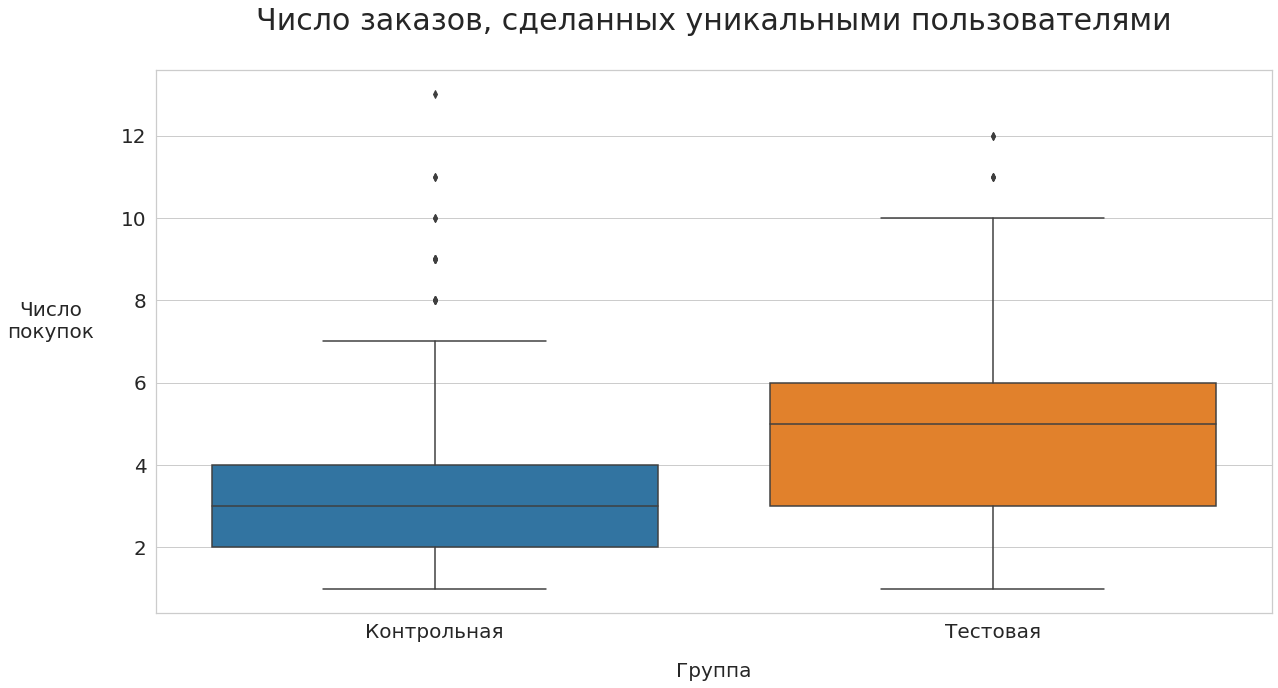

In [26]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.boxplot(data=df_purchases,y='purchase_counts',x='group')

# Сделаем подписи к графику
plt.title('Число заказов, сделанных уникальными пользователями\n', fontsize=30)
plt.xlabel('Группа', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Число\nпокупок', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
groups = ["Контрольная","Тестовая"]
plt.xticks(range(2), groups, fontsize=20)
plt.yticks(fontsize=20)

<h2>Проверка распределений на ГОМОГЕННОСТЬ ДИСПЕРСИЙ</h2><br>
<b>
<ul>
<li>Нулевая гипотеза - дисперсии равны</li>
<li>Альтернативная гипотеза - дисперсии НЕ равны</li>


</b>

In [27]:
# Проверка через критерий Левена - pingouin
pg.homoscedasticity(data=df_purchases, dv="purchase_counts", group='group')

,W,pval,equal_var
levene,17.195942,0.000037,False


Тест показал, что p-value < 0.05 - отклоняем нулевую гипотезу,<br>
Дисперсии распределений НЕ ГОМОГЕННЫ.

<h2>Используем метод BOOTSTRAP</h2><br>
Так как ни одно из условай для применения Т-теста не выполнено.<br>
<blockquote><ul> 
<li>H0 - cредние значения равны</li>
<li>H1 - cредние значения не равны</li>
</ul>  </blockquote>
<b>

In [28]:
print(f'Cреднее значение тестовой группы = {np.mean(df_purchases_test.purchase_counts)}')
print(f'Cреднее значение контрольной группы = {np.mean(df_purchases_control.purchase_counts)}')

Cреднее значение тестовой группы = 4.754491017964072
Cреднее значение контрольной группы = 2.982421875


In [29]:
# Cравним средние
bs_purchases_test = bs((df_purchases_test.purchase_counts, ), np.mean)
bs_purchases_test

BootstrapResult(confidence_interval=ConfidenceInterval(low=4.570858283433134, high=4.942115768463074), standard_error=0.09524072363120509)

In [30]:
bs_purchases_control = bs((df_purchases_control.purchase_counts, ), np.mean)
bs_purchases_control

BootstrapResult(confidence_interval=ConfidenceInterval(low=2.82421875, high=3.150390625), standard_error=0.08300508386215719)


Исходя из наложения доверительных интервалов средних значений, видно что им явно далеко до пересечения,<br>
отклоняем нулевую гипотезу, а изменения признаём статзначимыми в положительную сторону.



<H1>3 МЕТРИКА:<BR><BR>
   <I>КОЛИЧЕСТВО ПРОДУКТОВ В ПОКУПКЕ</H1>

In [31]:
# Cмерджим первые 2 таблицы
df_usersdata_and_orders = df_users_data_purchases.merge(ab_orders, on='order_id', how="left")
df_usersdata_and_orders

,user_id,order_id,action,time,date,group,creation_time,product_ids
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}"
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1,2022-08-26 00:02:21,"{56, 76, 39}"
2,964,1257,create_order,2022-08-26 00:02:27,2022-08-26,0,2022-08-26 00:02:27,"{76, 34, 41, 38}"
3,967,1259,create_order,2022-08-26 00:03:37,2022-08-26,1,2022-08-26 00:03:37,"{20, 45, 67, 26}"
4,968,1261,create_order,2022-08-26 00:05:35,2022-08-26,0,2022-08-26 00:05:35,"{30, 35, 69, 6}"
...,...,...,...,...,...,...,...,...
3904,990,59422,create_order,2022-09-08 23:13:03,2022-09-08,1,2022-09-08 23:13:03,"{84, 8, 24}"
3905,1418,59439,create_order,2022-09-08 23:18:05,2022-09-08,1,2022-09-08 23:18:05,"{9, 25, 75, 30, 6}"
3906,1605,59464,create_order,2022-09-08 23:22:27,2022-09-08,0,2022-09-08 23:22:27,"{60, 41, 46}"
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}"


In [32]:
# Посчитаем количесво продуктов в покупке
df_usersdata_and_orders['count_product_ids'] =  df_usersdata_and_orders.product_ids.str.strip('{}').str.split(',').str.len()   
df_usersdata_and_orders

,user_id,order_id,action,time,date,group,creation_time,product_ids,count_product_ids
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,"{75, 22, 53, 84}",4
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1,2022-08-26 00:02:21,"{56, 76, 39}",3
2,964,1257,create_order,2022-08-26 00:02:27,2022-08-26,0,2022-08-26 00:02:27,"{76, 34, 41, 38}",4
3,967,1259,create_order,2022-08-26 00:03:37,2022-08-26,1,2022-08-26 00:03:37,"{20, 45, 67, 26}",4
4,968,1261,create_order,2022-08-26 00:05:35,2022-08-26,0,2022-08-26 00:05:35,"{30, 35, 69, 6}",4
...,...,...,...,...,...,...,...,...,...
3904,990,59422,create_order,2022-09-08 23:13:03,2022-09-08,1,2022-09-08 23:13:03,"{84, 8, 24}",3
3905,1418,59439,create_order,2022-09-08 23:18:05,2022-09-08,1,2022-09-08 23:18:05,"{9, 25, 75, 30, 6}",5
3906,1605,59464,create_order,2022-09-08 23:22:27,2022-09-08,0,2022-09-08 23:22:27,"{60, 41, 46}",3
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,"{9, 62, 77}",3


In [33]:
print(f'Число уникальных заказов = {df_usersdata_and_orders.order_id.nunique()}')
print("Т.е. повторений нет, и дубликатов по номеру заказа нет")

Число уникальных заказов = 3909
Т.е. повторений нет, и дубликатов по номеру заказа нет


In [34]:
# Отберем нужные столбцы
df_product = df_usersdata_and_orders[['order_id', 'count_product_ids', 'group']]
df_product = df_product.sort_values(["order_id", "group"], ascending=True)
df_product

,order_id,count_product_ids,group
0,1255,4,0
1,1256,3,1
2,1257,4,0
3,1259,4,1
4,1261,4,0
...,...,...,...
3904,59422,3,1
3905,59439,5,1
3906,59464,3,0
3907,59487,3,0


In [35]:
df_usersdata_and_orders.groupby(["order_id", "group" ], as_index=False)\
                                                     .agg({"order_id":"count"})\

,group,order_id
0,0,1
1,1,1
2,0,1
3,1,1
4,0,1
...,...,...
3904,1,1
3905,1,1
3906,0,1
3907,0,1


In [36]:
# Выделим группы
df_product_test = df_product[df_product.group == 1]
df_product_control = df_product[df_product.group == 0]

# Размер выборок
print(f'Размер тестовой группы: {df_product_test.shape[0]}')
print(f'Размер контрольной группы: {df_product_control.shape[0]}')

Размер тестовой группы: 2382
Размер контрольной группы: 1527


<h2>Проверка распределений на НОРМАЛЬНОСТЬ</h2><br>
<b>Используем normaltest, тк размер выборок > 30</b>

In [37]:
pg.normality(data=df_product, dv="count_product_ids", group='group', method='normaltest')

,W,pval,normal
0,36.287512,1.319067e-08,False
1,42.201912,6.854430e-10,False


Тест показал, что распределения ненормальны! Посмотрим на их визуальзацию.

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 <a list of 9 Text major ticklabel objects>)

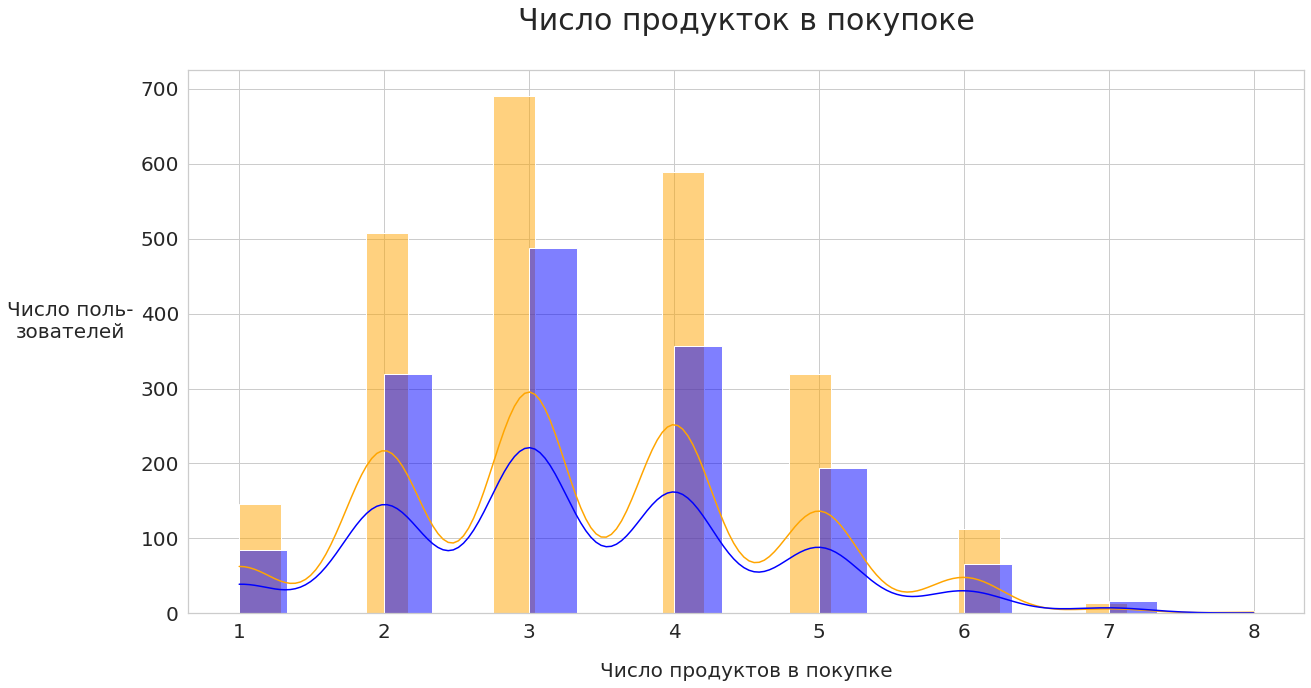

In [38]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.histplot(data=df_product_test.count_product_ids, color='orange', kde=True)
sns.histplot(data=df_product_control.count_product_ids, color='blue',  kde=True)

# Сделаем подписи к графику
plt.title('Число продукток в покупоке\n', fontsize=30)
plt.xlabel('Число продуктов в покупке', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Число поль-\nзователей', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text major ticklabel objects>)

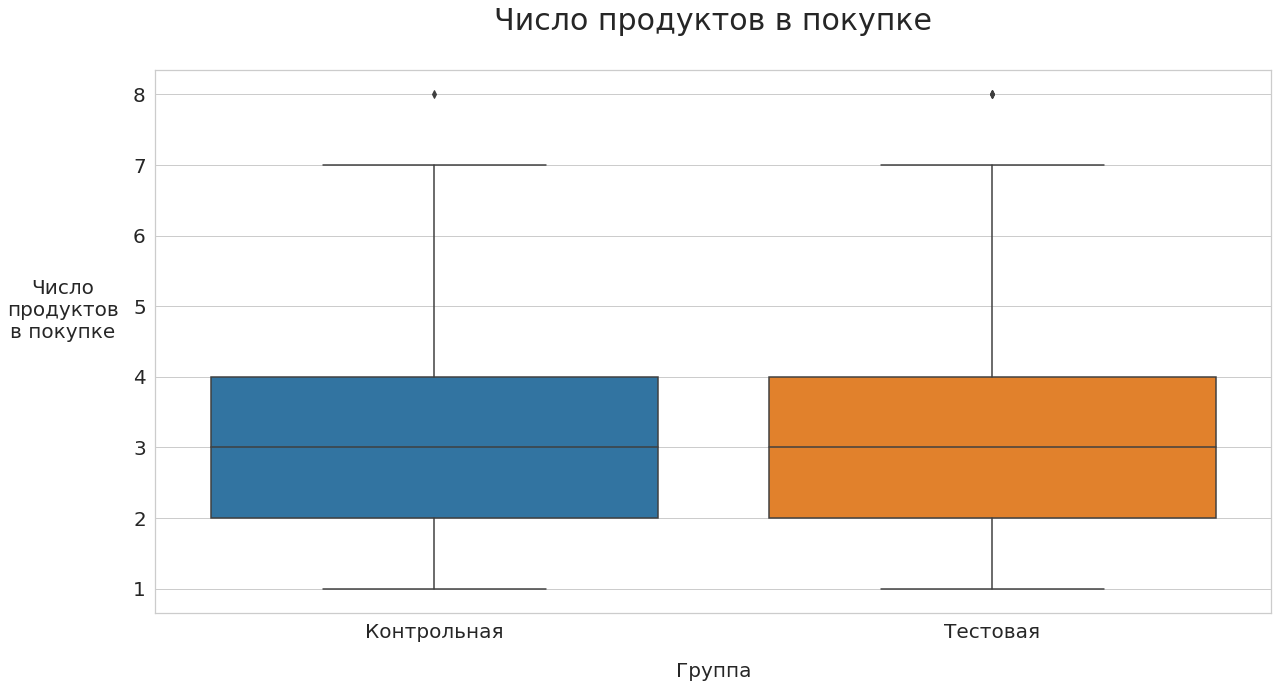

In [39]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.boxplot(data=df_product,y='count_product_ids',x='group')

# Сделаем подписи к графику
plt.title('Число продуктов в покупке\n', fontsize=30)
plt.xlabel('Группа', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Число\nпродуктов\nв покупке', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
groups = ["Контрольная","Тестовая"]
plt.xticks(range(2), groups, fontsize=20)
plt.yticks(fontsize=20)

<h2>Проверка распределений на ГОМОГЕННОСТЬ ДИСПЕРСИЙ</h2><br>
<b>
<ul>
<li>Нулевая гипотеза - дисперсии равны</li>
<li>Альтернативная гипотеза - дисперсии НЕ равны</li>


</b>

In [40]:
# Проверка через критерий Левена - pingouin
pg.homoscedasticity(data=df_product, dv="count_product_ids", group='group')

,W,pval,equal_var
levene,1.787948,0.181254,True


Тест показал, что p-value > 0.05 - принимаем нулевую гипотезу,<br>
Дисперсии распределений ГОМОГЕННЫ.

<h2>Используем параметрический метод Манна-Уитни</h2><br>
Так как проверка на нормальность не пройдена.<br>
<blockquote><ul> 
<li>H0 - вероятность взять из тестовой выборки более высокое значение, чем из контрольной</li>
<li>H1 - вероятность взять из тестовой выборки менее высокое значение, чем из контрольной</li>
</ul>  </blockquote>
<b>

In [41]:
ss.mannwhitneyu(df_product_test.count_product_ids, df_product_control.count_product_ids)

MannwhitneyuResult(statistic=1831186.0, pvalue=0.7083277937581569)

Принимаем нулевую гипотезу (тк p-value > 0.05), вероятность взять из тестовой выборки более высокое значение, чем из контрольной.<br>
Обе выборки эквивалентны (по ранжиру).

<h2>Используем метод BOOTSTRAP</h2><br>
Для проверки вывода критерия Манна-Уитни.<br>
<blockquote><ul> 
<li>H0 - cредние значения равны</li>
<li>H1 - cредние значения не равны</li>
</ul>  </blockquote>
<b>

In [42]:
print(f'Cреднее значение тестовой группы = {np.mean(df_product_test.count_product_ids)}')
print(f'Cреднее значение контрольной группы = {np.mean(df_product_control.count_product_ids)}')

Cреднее значение тестовой группы = 3.350125944584383
Cреднее значение контрольной группы = 3.341846758349705


In [43]:
# Cравним средние
bs_product_test = bs((df_product_test.count_product_ids, ), np.mean)
bs_product_test

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.2984886649874054, high=3.403022670025189), standard_error=0.026535615340217297)

In [44]:
bs_product_control = bs((df_product_control.count_product_ids, ), np.mean)
bs_product_control

BootstrapResult(confidence_interval=ConfidenceInterval(low=3.275703994760969, high=3.4034053700065487), standard_error=0.03288998724202524)


Исходя из наложения доверительных интервалов средних значений, видно что они пересекаются,<br>
принимаем нулевую гипотезу, а изменения признаём статнезначимыми.



<H1>4 МЕТРИКА:<BR><BR>
   <I>CУММАРНАЯ СТОИМОСТЬ ПРОДУКТОВ В ПОКУПКЕ</H1>

In [45]:
# Cмерджим первые 2 таблицы
df_usersdata_and_orders = df_users_data_purchases.merge(ab_orders, on='order_id', how="left")

# Создадим список продуктов список
df_usersdata_and_orders.product_ids = df_usersdata_and_orders.product_ids.str.strip('{}').str.split(',')

# Расщепим список
df_usersdata_and_orders = df_usersdata_and_orders.explode(column = "product_ids")
df_usersdata_and_orders.product_ids = df_usersdata_and_orders.product_ids.astype("int")
df_usersdata_and_orders

,user_id,order_id,action,time,date,group,creation_time,product_ids
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,75
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,22
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,53
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,84
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1,2022-08-26 00:02:21,56
...,...,...,...,...,...,...,...,...
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,9
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,62
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,77
3908,1376,59533,create_order,2022-09-08 23:41:24,2022-09-08,0,2022-09-08 23:41:24,17


In [46]:
# Словарь продукт-цена для функции
dict_products = ab_products[['product_id', 'price']].groupby("product_id").agg({"price":"min"}).to_dict()['price']

In [47]:
# Функция присвоения продукту цены
def pro_price(x, dict_products):
    y = 0
    for key, value in dict_products.items():
        if x == key:
            return value

df_usersdata_and_orders["sum_price"] = df_usersdata_and_orders.product_ids.apply(lambda x: pro_price(x, dict_products))
df_usersdata_and_orders

,user_id,order_id,action,time,date,group,creation_time,product_ids,sum_price
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,75,120.0
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,22,120.0
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,53,78.3
0,964,1255,create_order,2022-08-26 00:00:19,2022-08-26,0,2022-08-26 00:00:19,84,90.4
1,965,1256,create_order,2022-08-26 00:02:21,2022-08-26,1,2022-08-26 00:02:21,56,150.0
...,...,...,...,...,...,...,...,...,...
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,9,83.5
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,62,120.0
3907,1461,59487,create_order,2022-09-08 23:29:06,2022-09-08,0,2022-09-08 23:29:06,77,298.4
3908,1376,59533,create_order,2022-09-08 23:41:24,2022-09-08,0,2022-09-08 23:41:24,17,190.0


In [48]:
df_sumprice = df_usersdata_and_orders.groupby(["order_id", "group" ], as_index=False)\
                                                                                 .agg({"sum_price":"sum"})\
                                                                                 .sort_values(["order_id", "group"], ascending=True)
df_sumprice

,order_id,group,sum_price
0,1255,0,408.7
1,1256,1,250.5
2,1257,0,310.2
3,1259,1,228.0
4,1261,0,430.7
...,...,...,...
3904,59422,1,241.2
3905,59439,1,518.5
3906,59464,0,185.9
3907,59487,0,501.9


In [49]:
# Выделим группы
df_sumprice_test = df_sumprice[df_sumprice.group == 1]
df_sumprice_control = df_sumprice[df_sumprice.group == 0]

# Размер выборок
print(f'Размер тестовой группы: {df_sumprice_test.shape[0]}')
print(f'Размер контрольной группы: {df_sumprice_control.shape[0]}')

Размер тестовой группы: 2382
Размер контрольной группы: 1527


<h2>Проверка распределений на НОРМАЛЬНОСТЬ</h2><br>
<b>Используем normaltest, тк размер выборок > 30</b>

In [50]:
pg.normality(data=df_sumprice, dv="sum_price", group='group', method='normaltest')

,W,pval,normal
0,276.039777,1.144785e-60,False
1,586.947838,3.514766e-128,False


Тест показал, что распределения ненормальны! Посмотрим на их визуальзацию.

(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

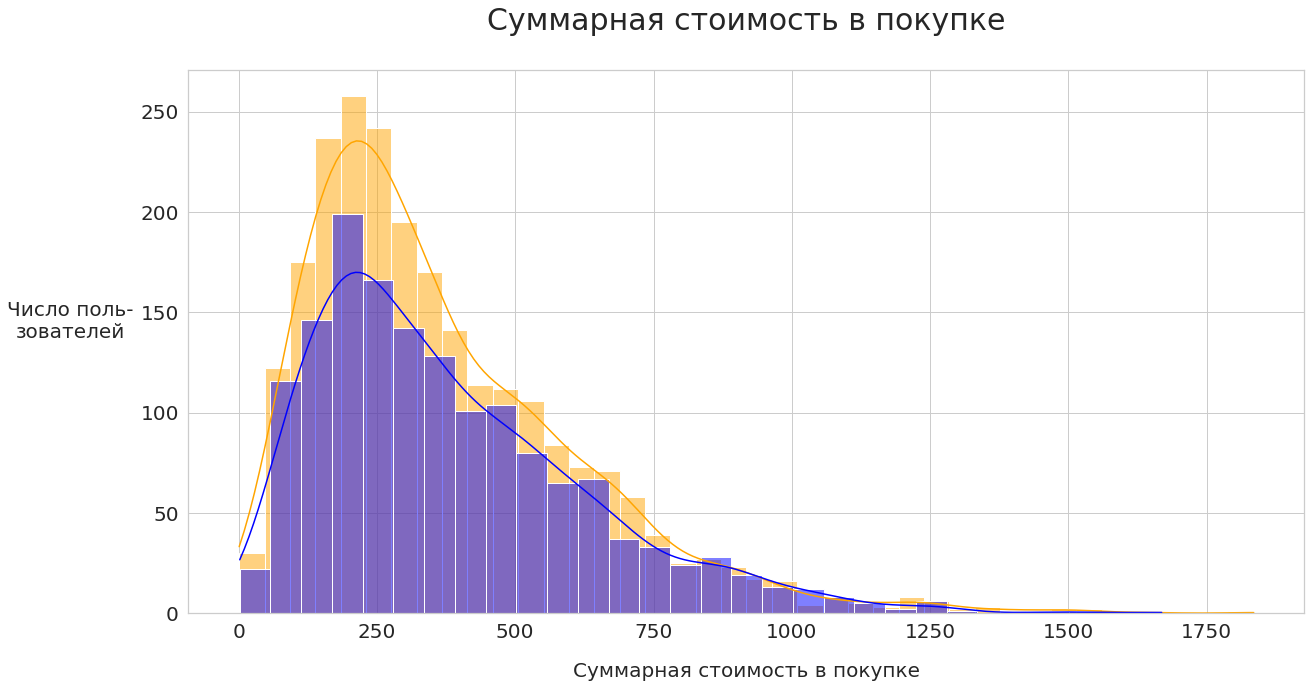

In [51]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.histplot(data=df_sumprice_test.sum_price, color='orange', kde=True)
sns.histplot(data=df_sumprice_control.sum_price, color='blue',  kde=True)

# Сделаем подписи к графику
plt.title('Суммарная стоимость в покупке\n', fontsize=30)
plt.xlabel('Суммарная стоимость в покупке', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Число поль-\nзователей', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text major ticklabel objects>)

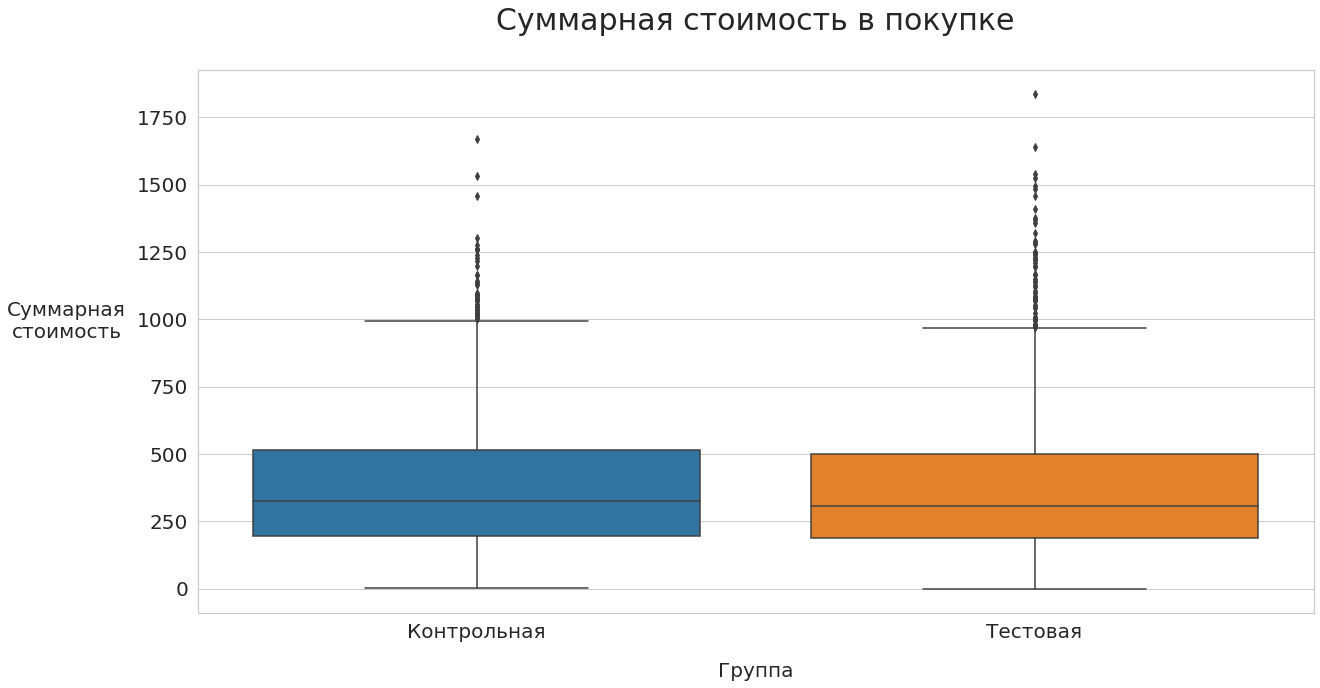

In [52]:
# Зададим размер и стиль графика
plt.figure(figsize=(20, 10))
sns.set(style='whitegrid', palette=None)

# Графики
sns.boxplot(data=df_sumprice,y='sum_price',x='group')

# Сделаем подписи к графику
plt.title('Суммарная стоимость в покупке\n', fontsize=30)
plt.xlabel('Группа', fontsize=20, rotation=0, labelpad=20)
plt.ylabel('Суммарная\nстоимость', fontsize=20, rotation=0, labelpad=70)

# Увеличим масштаб подписей осей
groups = ["Контрольная","Тестовая"]
plt.xticks(range(2), groups, fontsize=20)
plt.yticks(fontsize=20)

<h2>Проверка распределений на ГОМОГЕННОСТЬ ДИСПЕРСИЙ</h2><br>
<b>
<ul>
<li>Нулевая гипотеза - дисперсии равны</li>
<li>Альтернативная гипотеза - дисперсии НЕ равны</li>


</b>

In [53]:
# Проверка через критерий Левена - pingouin
pg.homoscedasticity(data=df_sumprice, dv="sum_price", group='group')

,W,pval,equal_var
levene,1.011786,0.314538,True


Тест показал, что p-value > 0.05 - принимаем нулевую гипотезу,<br>
Дисперсии распределений ГОМОГЕННЫ.

<h2>Используем параметрический метод Манна-Уитни</h2><br>
Так как проверка на нормальность не пройдена.<br>
<blockquote><ul> 
<li>H0 - вероятность взять из тестовой выборки более высокое значение, чем из контрольной</li>
<li>H1 - вероятность взять из тестовой выборки менее высокое значение, чем из контрольной</li>
</ul>  </blockquote>
<b>

In [54]:
ss.mannwhitneyu(df_sumprice_test.sum_price, df_sumprice_control.sum_price)

MannwhitneyuResult(statistic=1757446.0, pvalue=0.07539952478041778)

Принимаем нулевую гипотезу (тк p-value > 0.05), вероятность взять из тестовой выборки более высокое значение, чем из контрольной.<br>
Обе выборки эквивалентны (по ранжиру).

<h2>Используем метод BOOTSTRAP</h2><br>
Для проверки вывода критерия Манна-Уитни.<br>
<blockquote><ul> 
<li>H0 - cредние значения равны</li>
<li>H1 - cредние значения не равны</li>
</ul>  </blockquote>
<b>

In [55]:
print(f'Cреднее значение тестовой группы = {np.mean(df_sumprice_test.sum_price)}')
print(f'Cреднее значение контрольной группы = {np.mean(df_sumprice_control.sum_price)}')

Cреднее значение тестовой группы = 368.86162888329136
Cреднее значение контрольной группы = 382.09292730844794


In [56]:
# Cравним средние
bs_product_test = bs((df_sumprice_test.sum_price, ), np.mean)
bs_product_test

BootstrapResult(confidence_interval=ConfidenceInterval(low=358.9516746653602, high=378.74745487548574), standard_error=5.038379329763368)

In [57]:
bs_product_control = bs((df_sumprice_control.sum_price, ), np.mean)
bs_product_control

BootstrapResult(confidence_interval=ConfidenceInterval(low=369.90980388974907, high=394.54905458373884), standard_error=6.26660293497026)


Исходя из наложения доверительных интервалов средних значений, видно что они пересекаются,<br>
принимаем нулевую гипотезу, а изменения признаём статнезначимыми.



<h1>ВЫВОД:</h1>

<b>В ходе АБ-теста было получено статзначимое различие между 2 первыми метриками (в положительную сторону),<br>
а также между воторыми 2 метриками статзначимого различия выявлено не было (не было разницы).<br><br>

По моему мнению, <b><i>следует принять новую систему рекомендаций</i></b>.<br>
Так как первые 2 метрики (кол-во заказов.покупок, совершённых уникальным пользователем)<br>
наиболее ярко отражают полученную статзначимую пользу бизнесу.